In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Dickson/Downloads/Data Science tutorials/Data science project/my project/PhonesPriceInKenya.csv")
df.shape

(1148, 6)

In [3]:
df.head()

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...","11,800",4.0,56%,13
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...","7,999",4.5,69%,8
2,Samsung Galaxy M21 6GB128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,590",4.3,100%,30
3,Samsung Galaxy M21 4GB64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,499",3.8,94%,31
4,Samsung Galaxy A31 6GB128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...","24,999",3.8,98%,31


In [4]:
df.tail()

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes
1143,Nokia 105 2019,"Screen:1.77 inches, 120 x 160 pixels,Front Cam...","1,900",3.0,8%,11
1144,Nokia 220 4G,"Screen:2.4 inches, 240 x 320 pixels,Front Came...",NaN,4.0,11%,8
1145,Nokia X71,"Screen:6.39 inches, 1080 x 2316 pixels,Front C...",NaN,3.0,93%,53
1146,Nokia 22 3GB32GB,"Screen:5.71 inches, 720 x 1520 pixels,Front Ca...",NaN,3.4,47%,50
1147,Nokia 22 2GB16GB,"Screen:5.71 inches, 720 x 1520 pixels,Front Ca...","9,500",3.9,45%,39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Phone Title  1148 non-null   object 
 1   Specs        1148 non-null   object 
 2   Price(Kshs)  1070 non-null   object 
 3   Rating       1148 non-null   float64
 4   Specs Score  1148 non-null   object 
 5   Likes        1148 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 53.9+ KB


In [6]:
df.isnull().sum()

Phone Title     0
Specs           0
Price(Kshs)    78
Rating          0
Specs Score     0
Likes           0
dtype: int64

In [7]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

In [8]:
df.isnull().sum()

Phone Title    0
Specs          0
Price(Kshs)    0
Rating         0
Specs Score    0
Likes          0
dtype: int64

In [9]:
df.shape

(1070, 6)

In [10]:
df['Phone Title'].unique()

array(['Gionee M7 Power', 'Gionee M7', 'Samsung Galaxy M21 6GB128GB', ...,
       'Nokia 62 4GB64GB', 'Nokia 105 2019', 'Nokia 22 2GB16GB'],
      dtype=object)

In [11]:
df.loc[2,'Phone Title'].rsplit(' ',1)[:-1]

['Samsung Galaxy M21']

In [12]:
def ph_make(phm):
    return phm.split(' ')[0]

In [13]:
df['phone_make'] = df['Phone Title'].apply(ph_make)

In [14]:
def sreen_s(s):
    screen_s1 = s.split(':')[1]
    screen_s2 =float(screen_s1.split(' ')[0])
    return screen_s2

In [15]:
df['screen_size'] = df['Specs'].apply(sreen_s)

In [16]:
def b_camera(bc):
    return int(bc.split(' ')[2])*\
    int(bc.split('x')[1].replace('x','')[:-2])

In [17]:
#we now create new column for back_camera
df['back_camera'] = df.Specs.apply(b_camera)

In [18]:
df.sample(10)

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes,phone_make,screen_size,back_camera
471,HTC Desire 728G,"Screen:5.5 inches, 720 x 1280 pixels,Front Cam...","12,299",3.3,45%,4,HTC,5.50,921600
138,Oppo A9 2020 8GB128GB,"Screen:6.5 inches, 720 x 1600 pixels,Front Cam...","26,000",3.3,98%,153,Oppo,6.50,1152000
69,Sony Xperia L1,"Screen:5.5 inches, 720 x 1280 pixels,Front Cam...","13,500",3.3,40%,15,Sony,5.50,921600
802,Motorola Moto X4,"Screen:5.2 inches, 1080 x 1920 pixels,Front Ca...","12,990",3.0,56%,8,Motorola,5.20,2073600
683,Xiaomi Redmi Note 7 Pro 64GB,"Screen:6.3 inches, 1080 x 2340 pixels,Front Ca...","4,499",4.2,86%,23,Xiaomi,6.30,2527200
524,Infinix Hot 9 Play 4GB64GB,"Screen:6.82 inches, 720 x 1640 pixels,Front Ca...",869,3.8,64%,16,Infinix,6.82,1180800
703,Realme 7 Pro 8GB128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...","4,499",5.0,100%,6,Realme,6.40,2592000
1018,Sony Xperia XA1 Plus,"Screen:5.5 inches, 1080 x 1920 pixels,Front Ca...",584,4.3,67%,11,Sony,5.50,2073600
745,Huawei P8 Lite,"Screen:5.0 inches, 720 x 1280 pixels,Front Cam...",769,3.3,44%,31,Huawei,5.00,921600
393,Huawei Nova,"Screen:5.0 inches, 1080 x 1920 pixels,Front Ca...","1,510",3.8,55%,5,Huawei,5.00,2073600


In [19]:
def front_c(fca):
    front1 = fca.split(':')[2]
    front2 = front1.split(',')[0]
    front3 = front2.split('MP',1)[0]
    return front3

In [20]:
df['front_camera'] = df['Specs'].apply(front_c)

In [21]:
df['front_camera'].unique()

array(['8', '20', '32', '10', '13', '40', '5', '16', '25', 'TripleOS',
       '5.1', '2.2', '5 ', '24', '2', '16 ', '8 ', '2 ', '13 ', '4 ',
       'NoOS', '7', '12', '1.2', '7 ', 'VGAOS', '-OS', 'YesOS', '48',
       '2.1 ', '1.3 ', '0.3', '11'], dtype=object)

In [22]:
df.shape

(1070, 10)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df[~df['front_camera'].apply(is_float)]

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes,phone_make,screen_size,back_camera,front_camera
53,Samsung Galaxy A80,"Screen:6.7 inches, 1080 x 2400 pixels,Front Ca...","40,499",3.3,97%,72,Samsung,6.70,2592000,TripleOS
180,Nokia 210,"Screen:2.4 inches, 240 x 320 pixels,Front Came...","3,600",2.5,11%,7,Nokia,2.40,76800,NoOS
192,Nokia 8110 4G,"Screen:2.4 inches, 240 x 320 pixels,Front Came...","16,999",3.8,19%,16,Nokia,2.40,76800,NoOS
281,Tecno W2,"Screen:4.5 inches, 480 x 854 pixels,Front Came...","5,500",3.6,28%,27,Tecno,4.50,409920,VGAOS
512,Lava Prime X,"Screen:1.8 inches, 128 x 160 pixels,Front Came...","2,800",4.0,8%,1,Lava,1.80,20480,-OS
513,Lava A1,"Screen:1.8 inches, 128 x 160 pixels,Front Came...","3,000",4.5,8%,4,Lava,1.80,20480,-OS
514,Lava Champion C1,"Screen:2.4 inches, 240 x 320 pixels,Front Came...","2,500",2.0,10%,3,Lava,2.40,76800,YesOS
515,Lava Captain N1,"Screen:1.8 inches, 128 x 160 pixels,Front Came...","1,700",4.0,8%,2,Lava,1.80,20480,NoOS
945,Huawei Mate X,"Screen:8.0 inches, 2200 x 2480 pixels,, 6.6 in...","44,990",3.7,100%,26,Huawei,8.00,5456000,-OS
1124,Nokia 5310 2020,"Screen:2.4 inches, 240 x 320 pixels,Front Came...","5,499",3.7,25%,13,Nokia,2.40,76800,NoOS


In [25]:
df = df[df['front_camera'].apply(is_float)]

In [26]:
df[['front_camera']] = df[['front_camera']].apply(pd.to_numeric)

In [27]:
df.front_camera.unique()

array([ 8. , 20. , 32. , 10. , 13. , 40. ,  5. , 16. , 25. ,  5.1,  2.2,
       24. ,  2. ,  4. ,  7. , 12. ,  1.2, 48. ,  2.1,  1.3,  0.3, 11. ])

In [28]:
df.dtypes

Phone Title      object
Specs            object
Price(Kshs)      object
Rating          float64
Specs Score      object
Likes             int64
phone_make       object
screen_size     float64
back_camera       int64
front_camera    float64
dtype: object

In [29]:
df.shape

(1058, 10)

In [30]:
def oper_sy(os):
    os1 = os.split(':')[3]
    os2 = os1.split(' ')[0]
    os3 = os2.split(',')[0]
    return os3

In [31]:
df['OS'] = df['Specs'].apply(oper_sy)

In [32]:
df.OS.value_counts()

Android       1010
iOS             43
-                2
BlackBerry       2
KaiOS            1
Name: OS, dtype: int64

In [33]:
df.drop(df[(df['OS']=='-')].index, inplace=True)
df.drop(df[(df['OS']=='BlackBerry')].index, inplace=True)
df.drop(df[(df['OS']=='KaiOS')].index, inplace=True)

In [34]:
df.OS.value_counts()

Android    1010
iOS          43
Name: OS, dtype: int64

In [35]:
df.sample(5)

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes,phone_make,screen_size,back_camera,front_camera,OS
106,Tecno F1,"Screen:5.0 inches, 854 x 480 pixels,Front Came...","6,500",3.4,27%,98,Tecno,5.00,409920,2.0,Android
977,Tecno Camon 12 Air 3GB32GB,"Screen:6.55 inches, 720 x 1600 pixels,Front Ca...","13,500",2.3,52%,78,Tecno,6.55,1152000,8.0,Android
199,Nokia 1,"Screen:4.5 inches, 480 x 854 pixels,Front Came...","4,599",3.6,26%,17,Nokia,4.50,409920,2.0,Android
559,LG G5 64GB,"Screen:5.3 inches, 1440 x 2560 pixels,Front Ca...","1,190",4.0,58%,12,LG,5.30,3686400,8.0,Android
911,Samsung Galaxy C7 64 GB,"Screen:5.7 inches, 1080 x 1920 pixels,Front Ca...","1,185",4.3,61%,20,Samsung,5.70,2073600,8.0,Android


In [36]:
df.dtypes

Phone Title      object
Specs            object
Price(Kshs)      object
Rating          float64
Specs Score      object
Likes             int64
phone_make       object
screen_size     float64
back_camera       int64
front_camera    float64
OS               object
dtype: object

In [37]:
def rom_s(rm):
    s1 = rm.split('Storage:')[1]
    s2 = s1.split(',')[0]
    s3 = s2.split('GB')[0]
    return s3

In [38]:
df['ROM'] = df['Specs'].apply(rom_s)

In [39]:
df.drop(df[(df['ROM']=='1TB')].index, inplace=True)

In [40]:
df[['ROM']] = df[['ROM']].apply(pd.to_numeric)

In [41]:
def ram_s(ram):
    ram = ram.split('RAM:')[1]
    ram1 = float(ram.split('GB')[0])
    return ram1

In [42]:
df['RAM'] = df['Specs'].apply(ram_s)

In [43]:
def bat_p(bp):
    bat = bp.split('Battery:')[1]
    bat1 = bat.split('mAh')[0]
    return bat1

In [44]:
df['Battery'] = df['Specs'].apply(bat_p)

In [45]:
df.drop(df[(df['Battery']=='-')].index, inplace=True)

In [46]:
df[['Battery']] = df[['Battery']].apply(pd.to_numeric)

In [47]:
def spec_sc(sc):
    return int(sc.split('%')[0])

In [48]:
df['specs_score'] = df['Specs Score'].apply(spec_sc)

In [49]:
def price_cost(x):
    tokens = x.split(',')
    if len(tokens)==2:
        return (float(tokens[0])*1000+float(tokens[1]))
    else:
        return float(tokens[0])
    try:
        return float(x)
    except:
        return None

In [50]:
df['price'] = df['Price(Kshs)'].apply(price_cost)

In [51]:
df.sample(5)

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes,phone_make,screen_size,back_camera,front_camera,OS,ROM,RAM,Battery,specs_score,price
941,Huawei P30 Lite,"Screen:6.15 inches, 1080 x 2312 pixels,Front C...","24,500",3.8,72%,146,Huawei,6.15,2496960,32.0,Android,128,4.0,3340,72,24500.0
662,Huawei 9X 6GB128GB,"Screen:6.59 inches, 1080 x 2340 pixels,Front C...","1,450",5.0,95%,16,Huawei,6.59,2527200,16.0,Android,128,6.0,4000,95,1450.0
300,Oppo A92s 6GB128GB,"Screen:6.57 inches, 1080 x 2400 pixels,Front C...",530,3.0,93%,4,Oppo,6.57,2592000,16.0,Android,128,6.0,4000,93,530.0
993,BlackBerry Key2 64GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...","58,500",3.1,64%,15,BlackBerry,4.50,1749600,8.0,Android,64,6.0,3500,64,58500.0
1079,Vivo Y15 4GB64GB,"Screen:6.35 inches, 720 x 1544 pixels,Front Ca...","21,499",3.8,62%,20,Vivo,6.35,1111680,16.0,Android,64,4.0,5000,62,21499.0


In [52]:
cols_to_drop = ['Phone Title','Specs','Price(Kshs)','Specs Score']

In [53]:
df1 = df.copy()
df1 = df.drop(cols_to_drop, axis = 'columns')


In [54]:
df1.head()

,Rating,Likes,phone_make,screen_size,back_camera,front_camera,OS,ROM,RAM,Battery,specs_score,price
0,4.0,13,Gionee,6.00,1036800,8.0,Android,64,4.0,4000,56,11800.0
1,4.5,8,Gionee,6.01,2332800,8.0,Android,64,6.0,4000,69,7999.0
2,4.3,30,Samsung,6.40,2527200,20.0,Android,128,6.0,6000,100,22590.0
3,3.8,31,Samsung,6.40,2527200,20.0,Android,64,4.0,6000,94,22499.0
4,3.8,31,Samsung,6.40,2592000,20.0,Android,128,6.0,5000,98,24999.0


In [55]:
df1.columns

Index(['Rating', 'Likes', 'phone_make', 'screen_size', 'back_camera',
       'front_camera', 'OS', 'ROM', 'RAM', 'Battery', 'specs_score', 'price'],
      dtype='object')

In [56]:
df1 = df1[['phone_make', 'OS', 'ROM', 'RAM', 'screen_size', 'back_camera', 'front_camera', 'Battery', 'Rating', 'Likes', 
        'specs_score', 'price']]

In [57]:
df1.sample(5)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
1130,Nokia,Android,16,1.0,5.70,1036800,5.0,2800,3.0,8,33,8500.0
583,Samsung,Android,16,2.0,5.00,921600,5.0,2600,3.0,10,37,1150.0
392,Huawei,Android,32,4.0,5.20,2073600,8.0,3000,4.2,11,58,1510.0
238,Xiaomi,Android,128,6.0,6.26,2462400,24.0,3350,5.0,13,67,26499.0
125,Oppo,Android,64,4.0,6.50,1152000,8.0,4230,3.3,32,61,17999.0


In [58]:
df1.describe()

,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
count,1036.000000,1036.000000,1036.000000,1.036000e+03,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,85.459459,4.480695,6.003272,2.090206e+06,13.494788,3754.186293,3.919595,25.926641,67.870656,19860.905405
std,81.117802,2.446651,0.599467,1.020411e+06,8.833887,837.656194,0.746452,32.957833,21.228699,26932.338237
min,8.000000,0.500000,4.000000,3.840000e+05,1.200000,1560.000000,1.300000,1.000000,26.000000,84.000000
25%,32.000000,3.000000,5.500000,1.123200e+06,8.000000,3020.000000,3.400000,7.750000,52.000000,1270.000000
50%,64.000000,4.000000,6.200000,2.073600e+06,10.000000,4000.000000,4.000000,15.000000,62.000000,12299.000000
75%,128.000000,6.000000,6.500000,2.592000e+06,16.000000,4200.000000,4.500000,30.000000,91.000000,24999.000000
max,512.000000,12.000000,8.100000,8.294400e+06,48.000000,7000.000000,5.000000,296.000000,100.000000,170000.000000


In [59]:
#df2 = df1.copy()
#df2 = df2[(df2['price']>2000) & (df2['ROM']>32)]



In [60]:
#df3 = df1.copy()
#df3 = df3[(df3['price']>=1500)]

In [61]:
#df3.shape

In [62]:
#df3.sample(20)

In [63]:
df1.shape

(1036, 12)

In [64]:
df.OS.value_counts()

Android    1008
iOS          28
Name: OS, dtype: int64

In [65]:
df1.shape

(1036, 12)

In [66]:
''''
def remove_price_outliers(df1):
    df_out = pd.DataFrame()
    for key, subdf in df1.groupby('phone_make'):
        m=np.mean(subdf.price)
        sd=np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-sd)) & (subdf.price<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df2 = remove_price_outliers(df1)
df2.shape'''

"'\ndef remove_price_outliers(df1):\n    df_out = pd.DataFrame()\n    for key, subdf in df1.groupby('phone_make'):\n        m=np.mean(subdf.price)\n        sd=np.std(subdf.price)\n        reduced_df = subdf[(subdf.price>(m-sd)) & (subdf.price<=(m+sd))]\n        df_out = pd.concat([df_out,reduced_df], ignore_index=True)\n    return df_out\n\ndf2 = remove_price_outliers(df1)\ndf2.shape"

In [67]:
df1.price.describe()

count      1036.000000
mean      19860.905405
std       26932.338237
min          84.000000
25%        1270.000000
50%       12299.000000
75%       24999.000000
max      170000.000000
Name: price, dtype: float64

In [68]:
len(df1[(df1['price']<500)])

46

In [69]:
len(df1[(df1['price']<1000)])

181

In [70]:
df1.shape

(1036, 12)

In [71]:
1036-181

855

In [72]:
df2 = df1[~(df1['price']<1000)]

In [73]:
df2.sample(10)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
853,Xiaomi,Android,128,6.0,6.67,2592000,16.0,5020,4.3,24,98,24500.0
193,Nokia,Android,32,3.0,5.86,1094400,8.0,3060,3.8,61,53,14500.0
199,Nokia,Android,8,1.0,4.50,409920,2.0,1800,3.6,17,26,4599.0
323,Realme,Android,128,8.0,6.44,2592000,16.0,4200,5.0,4,100,13799.0
629,Samsung,Android,8,1.0,5.00,518400,5.0,2600,4.7,15,33,1539.0
483,Xiaomi,Android,64,4.0,6.30,2527200,13.0,4000,5.0,17,86,19500.0
105,Tecno,Android,8,1.0,5.00,409920,2.0,2000,3.4,38,28,11999.0
505,Xiaomi,Android,64,4.0,6.53,2527200,20.0,4500,3.7,18,99,22000.0
983,Tecno,Android,32,2.0,6.20,1080000,8.0,3500,3.3,175,47,12500.0
1073,Apple,iOS,32,3.0,5.50,2073600,7.0,2900,3.5,30,50,38000.0


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

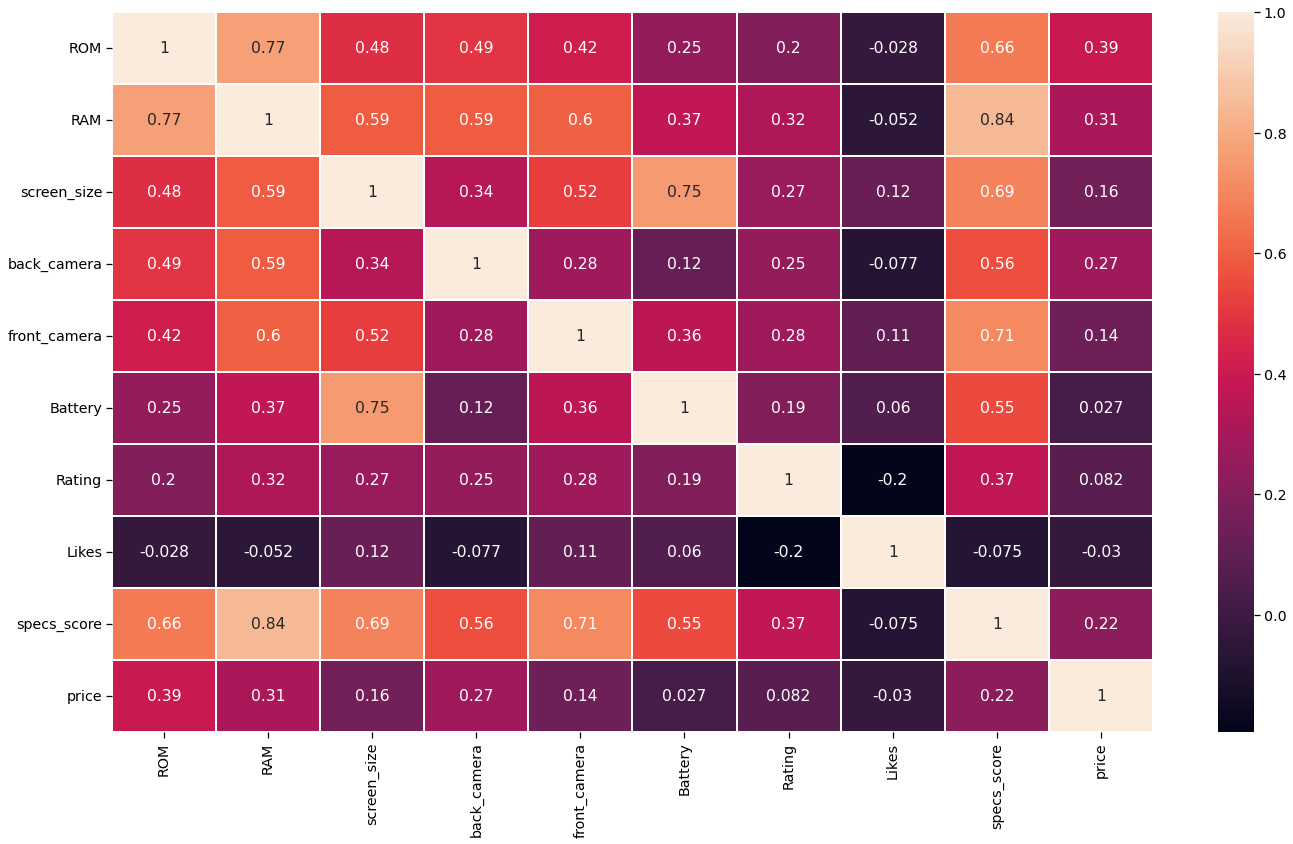

In [74]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df2.corr(),annot=True,linewidth =2)
plt.tight_layout()

By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

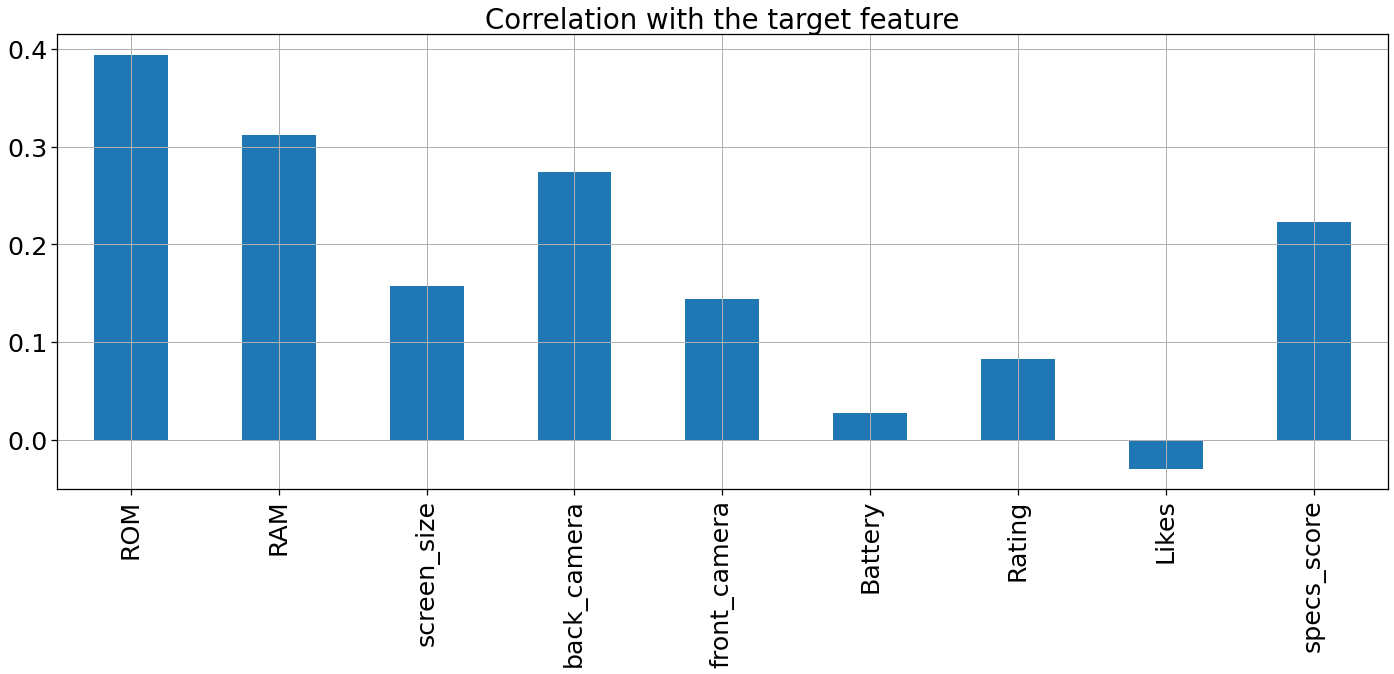

In [75]:
sns.set_context('notebook',font_scale = 2.3)
df2.drop('price', axis=1).corrwith(df2.price).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

Inference: Insights from the above graph are:

1. all features except likes are positively correlated with the target feature.
2. The like feature is negatively correlated with the target feature.

So, we have done enough collective analysis now let’s go for the analysis of the individual features which comprises both univariate and bivariate analysis.

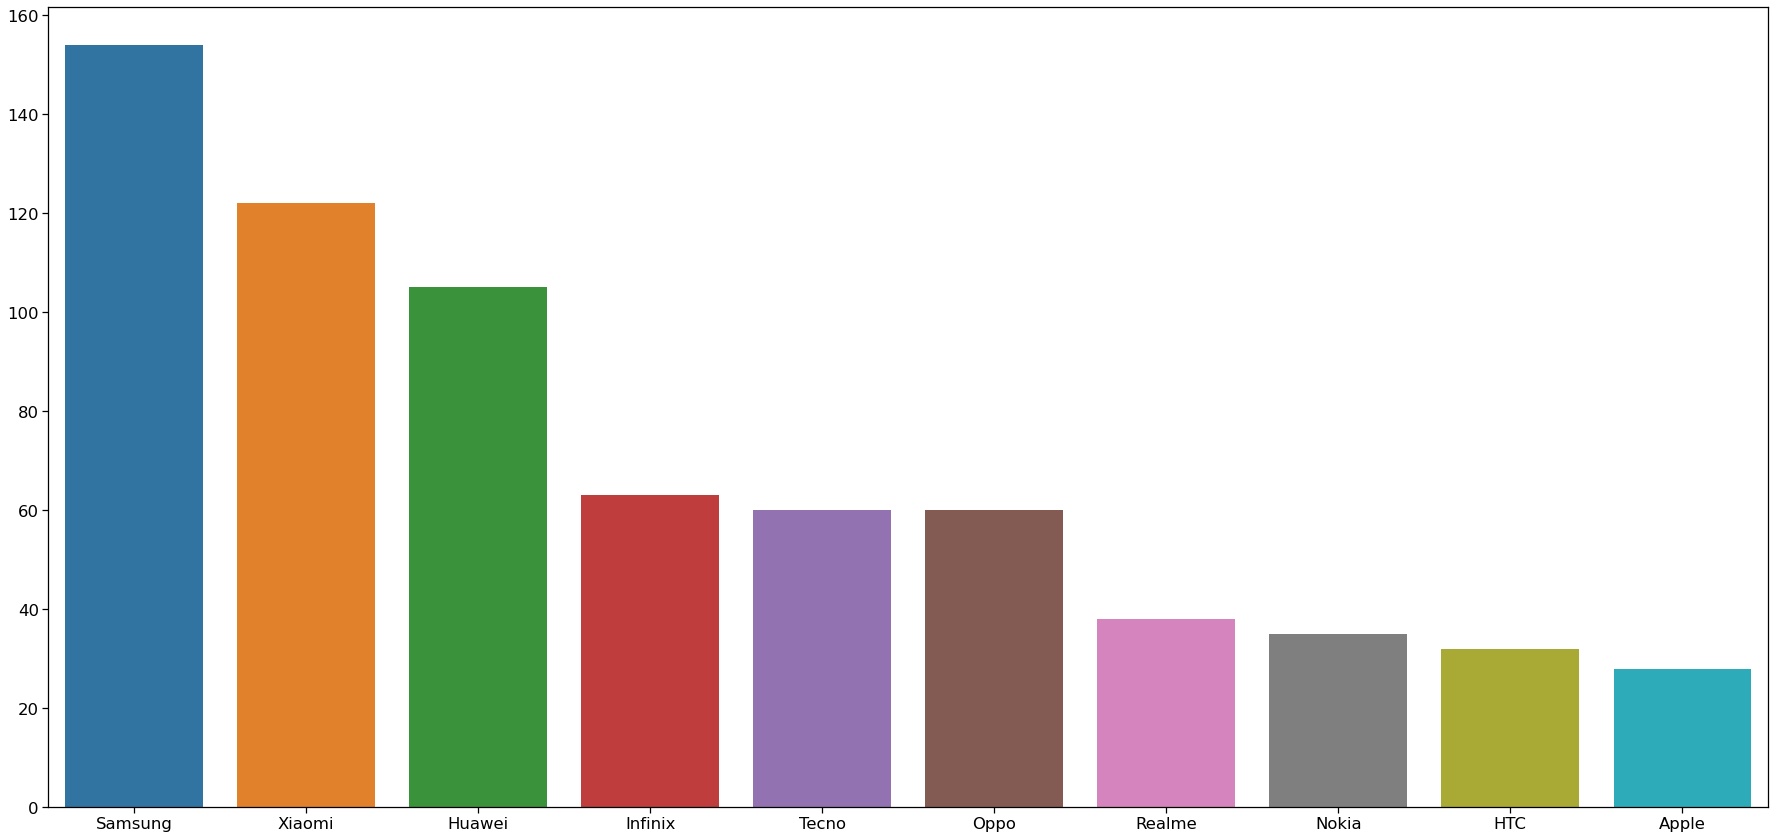

In [76]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df2.phone_make.value_counts()[:10].index,y=df2.phone_make.value_counts()[:10].values)
plt.tight_layout()

Inference: Here we can see that the samsung phone make  has the highest frequency.

Let’s check the specs_score range  in the dataset.

In [77]:
minscore=min(df2.specs_score)
maxscore=max(df2.specs_score)
meanscore=df2.specs_score.mean()
print('Min Feature Score :',minscore)
print('Max Feature Score :',maxscore)
print('Mean Feature Score :',meanscore)

Min Feature Score : 26
Max Feature Score : 100
Mean Feature Score : 67.74385964912281


We should divide the specs_score feature into three parts – “Lowest”, “Middle” and “Highest”

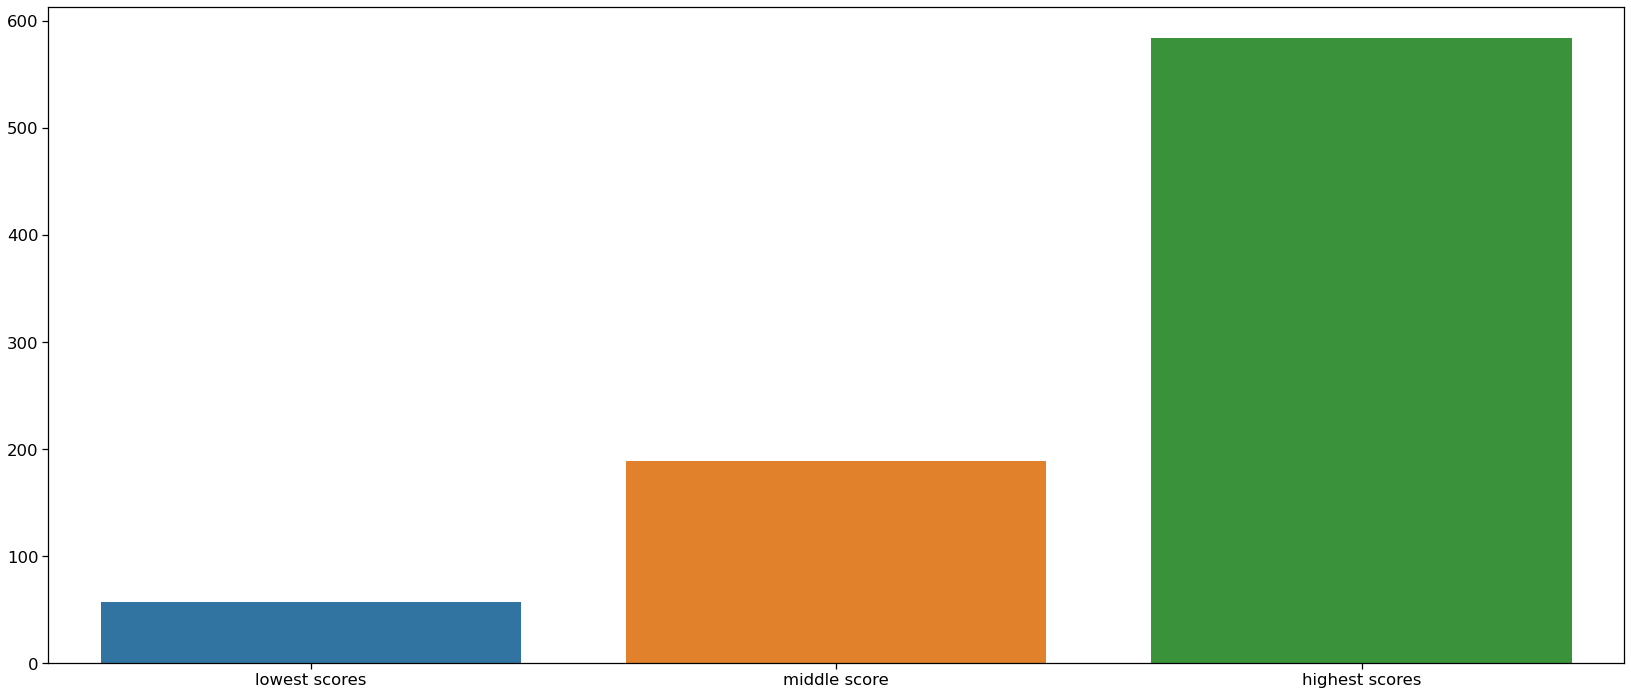

In [78]:
Lowest = df2[(df2.specs_score>=29)&(df2.specs_score<40)]
Middle = df2[(df2.specs_score>=40)&(df2.specs_score<55)]
Highest = df2[(df2.specs_score>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['lowest scores','middle score','highest scores'],y=[len(Lowest),len(Middle),len(Highest)])
plt.tight_layout()

Inference: Here we can see that most phones are given highests specs score with few having lowest scores.

To prove the above inference we will plot the pie chart.

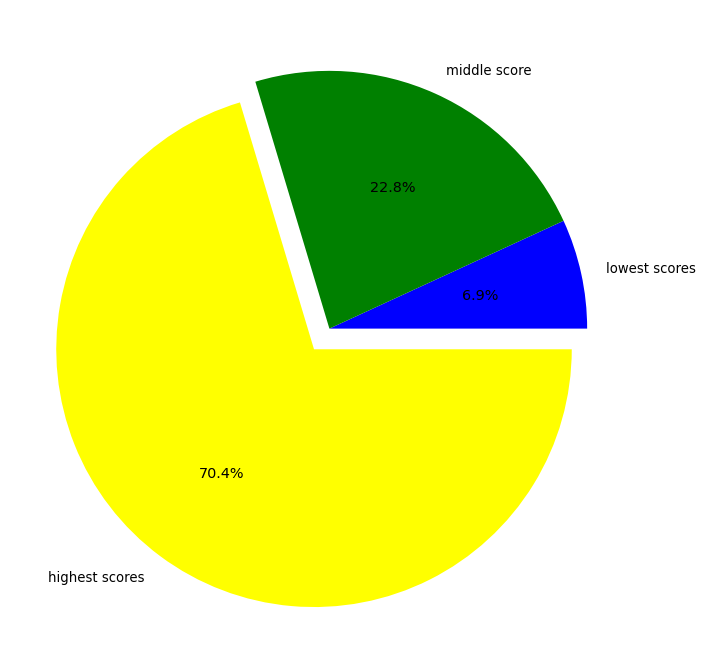

In [79]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Lowest),len(Middle),len(Highest)],labels=['lowest scores','middle score','highest scores'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

Now let’s plot the relation between phone_make and likes.

In [80]:
df2.Likes.describe()

count    855.000000
mean      27.400000
std       34.123402
min        1.000000
25%        8.000000
50%       16.000000
75%       32.000000
max      296.000000
Name: Likes, dtype: float64

In [81]:
df2.phone_make.value_counts()

Samsung       154
Xiaomi        122
Huawei        105
Infinix        63
Tecno          60
Oppo           60
Realme         38
Nokia          35
HTC            32
Apple          28
Sony           27
OnePlus        25
LG             21
Lenovo         21
Google         15
BlackBerry     11
Motorola        9
Honor           7
Vivo            6
Cubot           6
Hotwav          3
Lava            3
Microsoft       2
Gionee          2
Name: phone_make, dtype: int64

We can now plot histogram to check price feature is distributed

Text(0, 0.5, 'Count')

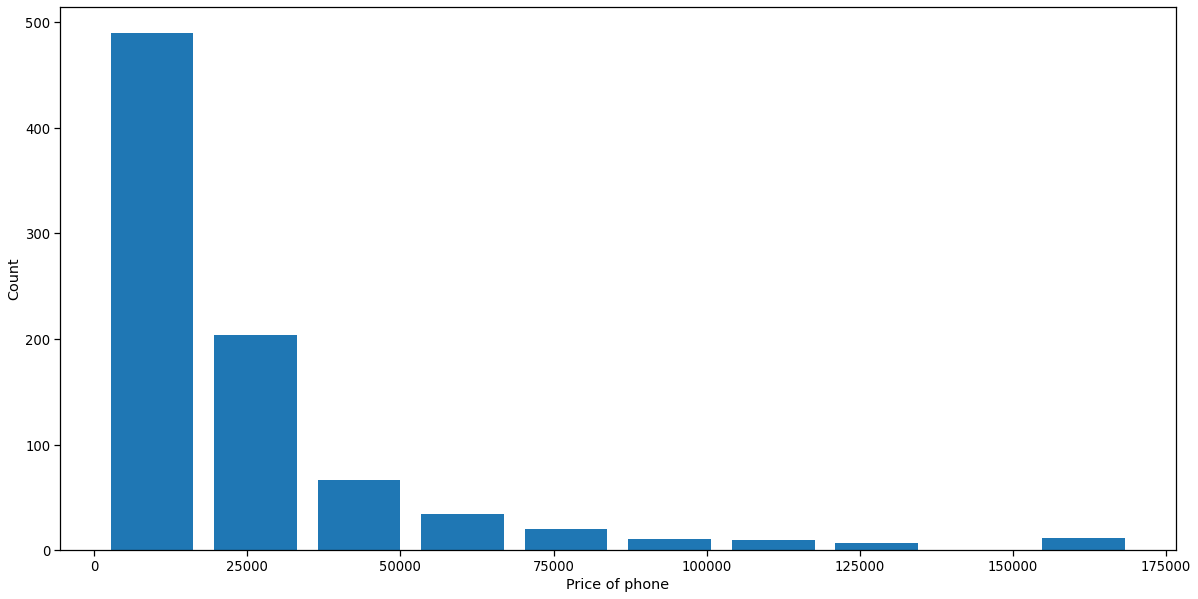

In [82]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df2.price,rwidth=0.8)
plt.xlabel('Price of phone')
plt.ylabel('Count')
#shows that the data is normally distributed

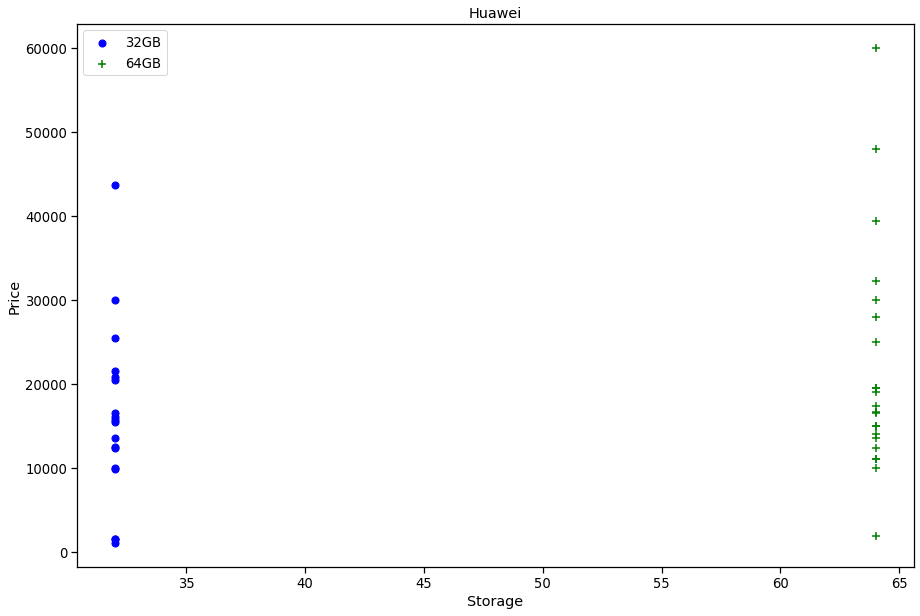

In [83]:
#next we can check instances where property prices for 2bedroom more than price for 3 bedroom
#we can visualize the data to identify such cases
def plot_scatter_chart(df,phone_make):
    rom32 = df[(df.phone_make==phone_make) & (df.ROM==32)]
    rom64 = df[(df.phone_make==phone_make) & (df.ROM==64)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(rom32.ROM,rom32.price,color='blue',label='32GB', s=50)
    plt.scatter(rom64.ROM,rom64.price,marker='+',color='green',label='64GB', s=50)
    plt.xlabel('Storage')
    plt.ylabel('Price')
    plt.title('Huawei')
    plt.legend()
    

plot_scatter_chart(df2,'Huawei')

In [84]:
df2.sample(5)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
161,Xiaomi,Android,16,2.0,5.50,921600,16.0,3080,3.4,13,47,15500.0
544,Infinix,Android,16,1.0,5.50,1036800,8.0,3050,4.0,72,43,8700.0
949,Huawei,Android,32,3.0,6.26,1094400,16.0,4000,3.4,73,54,15700.0
323,Realme,Android,128,8.0,6.44,2592000,16.0,4200,5.0,4,100,13799.0
944,Huawei,Android,32,2.0,6.09,1123200,8.0,3020,3.7,112,45,12499.0


In [85]:
df2.phone_make = df2.phone_make.apply(lambda x: x.strip())#removes any spaces at begging or end of location

phone_make_stats = df2.groupby('phone_make')['phone_make'].agg('count').sort_values(ascending = False)
phone_make_stats

phone_make
Samsung       154
Xiaomi        122
Huawei        105
Infinix        63
Tecno          60
Oppo           60
Realme         38
Nokia          35
HTC            32
Apple          28
Sony           27
OnePlus        25
LG             21
Lenovo         21
Google         15
BlackBerry     11
Motorola        9
Honor           7
Cubot           6
Vivo            6
Lava            3
Hotwav          3
Microsoft       2
Gionee          2
Name: phone_make, dtype: int64

In [86]:
len(phone_make_stats[phone_make_stats<=10])

8

In [87]:
phone_make_stats_less_than_10 = phone_make_stats[phone_make_stats<=10]
phone_make_stats_less_than_10

phone_make
Motorola     9
Honor        7
Cubot        6
Vivo         6
Lava         3
Hotwav       3
Microsoft    2
Gionee       2
Name: phone_make, dtype: int64

In [88]:
len(df2.phone_make.unique())

24

In [89]:
#to make the other group
df2.phone_make = df2.phone_make.apply(lambda x: 'other' if x in phone_make_stats_less_than_10 else x)
len(df2.phone_make.unique())

17

In [90]:
df2.sample(10)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
711,Realme,Android,128,6.0,6.50,1152000,8.0,5000,5.0,2,69,12999.0
233,Xiaomi,Android,64,6.0,6.39,2527200,20.0,4000,3.9,18,95,37500.0
764,Huawei,Android,128,4.0,6.53,2423520,24.0,4000,4.5,9,67,50000.0
341,Samsung,Android,256,12.0,6.90,4446720,10.0,4500,5.0,17,100,130999.0
200,Nokia,Android,64,4.0,6.00,2332800,16.0,3800,4.3,60,61,72380.0
573,LG,Android,128,4.0,6.00,4147200,5.0,3300,4.6,9,70,89000.0
510,other,Android,8,1.0,5.00,409920,5.0,2500,4.0,13,32,7000.0
285,Oppo,Android,128,8.0,6.43,2592000,16.0,4000,4.7,9,98,20999.0
886,Infinix,Android,16,1.0,5.50,921600,5.0,4000,3.7,25,38,5699.0
713,Realme,Android,128,4.0,6.50,2592000,16.0,4300,5.0,7,100,12999.0


In [91]:
df2.OS.unique()

array(['Android', 'iOS'], dtype=object)

In [92]:
df2['OS'].replace({'Android':1,'iOS':0},inplace=True)

In [93]:
df2.sample(5)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
852,Xiaomi,1,64,3.0,6.53,2527200,13.0,5020,4.5,7,87,8850.0
871,Infinix,1,16,2.0,6.20,1080000,8.0,4000,3.3,25,43,13500.0
302,Oppo,1,128,4.0,6.50,2592000,16.0,5000,5.0,7,93,1140.0
355,Samsung,1,64,6.0,6.50,1152000,13.0,5000,3.2,22,91,1000.0
1141,Nokia,1,64,4.0,6.30,2462400,8.0,3500,5.0,30,61,20500.0


In [94]:
dummies= pd.get_dummies(df2.phone_make)
dummies.head(3)

,Apple,BlackBerry,Google,HTC,Huawei,Infinix,LG,Lenovo,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Tecno,Xiaomi,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
#we now join these dummies to our main dataframe and as normal rule for dummies, we drop one column in this case other column
df3 = pd.concat([df2,dummies.drop('other',axis='columns')], axis='columns')
df3.head(3)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,...,LG,Lenovo,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Tecno,Xiaomi
0,other,1,64,4.0,6.00,1036800,8.0,4000,4.0,13,...,0,0,0,0,0,0,0,0,0,0
1,other,1,64,6.0,6.01,2332800,8.0,4000,4.5,8,...,0,0,0,0,0,0,0,0,0,0
2,Samsung,1,128,6.0,6.40,2527200,20.0,6000,4.3,30,...,0,0,0,0,0,0,1,0,0,0


In [96]:
#we can now drop phone_make column since we have created dummies out of it
df4 = df3.drop('phone_make',axis='columns')
df4.head(2)

,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,...,LG,Lenovo,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Tecno,Xiaomi
0,1,64,4.0,6.00,1036800,8.0,4000,4.0,13,56,...,0,0,0,0,0,0,0,0,0,0
1,1,64,6.0,6.01,2332800,8.0,4000,4.5,8,69,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df4.shape

(855, 27)

In [98]:
#we now create our X and y variables
X = df4.drop('price', axis = 'columns')
X.head(2)

,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,...,LG,Lenovo,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Tecno,Xiaomi
0,1,64,4.0,6.00,1036800,8.0,4000,4.0,13,56,...,0,0,0,0,0,0,0,0,0,0
1,1,64,6.0,6.01,2332800,8.0,4000,4.5,8,69,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y = df4.price
y.head(2)

0    11800.0
1     7999.0
Name: price, dtype: float64

In [100]:
#we can now split our dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)

In [101]:
#we can now create a linear model for the train dataset
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
y_pred = lr_clf.predict(X_test)

In [102]:
y_test.head(5)

314    124999.0
764     50000.0
376     28000.0
882      1719.0
548     12990.0
Name: price, dtype: float64

In [103]:
y_pred[:5]

array([43000.38342285, 28075.37402344, 22650.60571289,  5141.37646484,
       15079.94921875])

In [104]:
#we can try a couple of models with different models to comeup with best model
#lets begin with k fold cross validation cv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state =0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.24223633, 0.10227693, 0.16084724, 0.26164709, 0.18998108])

In [105]:
#we can try different algorithms to see which one gives the best model using gridsearch cv
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclinic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.192697,{'normalize': True}
1,lasso,0.191843,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.293657,"{'criterion': 'mse', 'splitter': 'random'}"


In [106]:
df2.sample(5)

,phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score,price
952,Huawei,1,128,8.0,6.40,2494800,25.0,3750,3.5,27,99,43750.0
1074,Apple,0,256,2.0,4.70,1000500,7.0,1960,3.0,6,57,40000.0
989,BlackBerry,1,32,4.0,4.50,1749600,8.0,3000,4.5,4,56,46500.0
427,OnePlus,1,256,8.0,6.41,2527200,16.0,3700,3.4,21,100,50000.0
70,Sony,1,16,2.0,5.50,2073600,5.0,2600,2.7,6,49,10048.0


In [107]:
#we can confidently use the LinearRegression we trained earlier for our predictions.
#we can now write a property price prediction function basing from our model
def predict_price(phone_make,OS,ROM,RAM,screen_size,back_camera,front_camera,Battery,Rating,Likes,specs_score):
    phone_index = np.where(X.columns==phone_make)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = OS
    x[1] =  ROM
    x[2] = RAM
    x[3] = screen_size
    x[4] = back_camera
    x[5] = front_camera
    x[6] = Battery
    x[7] = Rating
    x[8] = Likes
    x[9] = specs_score
    if phone_index >=0:
        x[phone_index] = 1
        
    return lr_clf.predict([x])[0]

In [108]:
#we can now predict price of different locations using the function above
predict_price('Samsung',1,128,6.0,6.40,2527200,20.0,6000,4.3,30,100)

24661.514770507812

In [109]:
predict_price('Nokia',1,16,2.0,6.0,1036800,8.0,3500,4.5,15,51)

11738.169067382812

In [110]:
predict_price('Google',1,64,4.0,5.0,2073600,8.0,2700,2.9,11,60)

36982.58410644531

In [117]:
predict_price('Samsung',1,64,4.0,5.0,2073600,8.0,2700,2.9,11,60)

17405.6953125

In [111]:
#we can now export our model to a pickle file to be used by our python flask server
import pickle
with open('kenya_phone_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [112]:
#we also need to export the columns the way they appear in our data
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))